## Problem Statement

Belum memiliki strategi yang tepat untuk menawarkan jenis produk yang sesuai dengan segmen calon nasabah yang akan direkrut

## Objective

Membuat sebuah model <i>clustering</i> untuk mengetahui kepemilikan produk berdasarkan demografi nasabah yang saat ini sudah menggunakan layanan FundFusion dengan <i>Silhouette Score</i> > 0.7

## Variabel yang Tersedia

Dari dataset yang dimiliki terdapat beberapa data yang tersedia:
1. <b>GCIF:</b> Unique identifier nasabah
2. <b>Area:</b> Lokasi nasabah (Jakarta, Bogor, Bandung, Surabaya, Jogja, Solo)
3. <b>Jalur_Pembukaan:</b> Touch points nasabah membuka produk -> cabang, telemarketing, aplikasi digital, internet banking
4. <b>Vintage:</b> Durasi menjadi nasabah (sejak membuka akun)
5. <b>Usia:</b> Usia nasabah
6. <b>Jenis_Kelamin:</b> Laki-laki (1) & perempuan (0)
7. <b>Status_Perkawinan:</b> Belum menikah (0), menikah (1), cerai (2), janda/duda (3)
8. <b>Jumlah_anak:</b> Jumlah anak nasabah (numerik)
9. <b>Pendidikan:</b> Status pendidikan terakhir -> tidak memiliki pendidikan formal (0), SD (1), SMP (2), SMA (3), Sarjana (4), Magister (5), Doktor (6)
10. <b>Produk_Tabungan:</b> Status kepemilikan produk (Yes/1, No/0)
11. <b>Produk_Deposito:</b> Status kepemilikan produk (Yes/1, No/0)
12. <b>Produk_Kartu_Kredit:</b> Status kepemilikan produk (Yes/1, No/0)
13. <b>Produk_Kredit_Rumah:</b> Status kepemilikan produk (Yes/1, No/0)
14. <b>Produk_Kredit_Kendaraan:</b> Status kepemilikan produk (Yes/1, No/0)
15. <b>Produk_Kredit_Dana_Tunai:</b> Status kepemilikan produk (Yes/1, No/0)
16. <b>Total_Kepemilikan_Produk:</b> Jumlah produk yang dimiliki (penjumlahan dari produk2)
17. <b>Pendapatan_Tahunan:</b> Rata-rata pendapatan dalam setahun
18. <b>Total_Relationship_Balance:</b> Total asset nasabah dalam cutooff bulan observasi


## Eksperimen

Point of View:
1. Dikelompokkan berdasarkan demografis untuk dicari <i>pattern</i> kepemilikan produk
2. Dikelompokkan berdasarkan kepemilikan produk untuk dicari <i>pattern</i> berdasarkan demografisnya

## Import Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
pd.set_option('display.max_columns', None)

## Data for Clustering

In [3]:
path_1 = "https://raw.githubusercontent.com/brainspopper/dataset/main/clustering_data.csv"
data = pd.read_csv(path_1)

In [4]:
data.dtypes

GCIF                           object
Area                           object
Jalur_Pembukaan                object
Vintage                        object
Usia                          float64
Jenis_Kelamin                  object
Status_Perkawinan              object
Jumlah_Anak                     int64
Pendidikan                     object
Produk_Tabungan                 int64
Produk_Deposito                 int64
Produk_Kartu_Kredit             int64
Produk_Kredit_Rumah             int64
Produk_Kredit_Kendaraan         int64
Produk_Kredit_Dana_Tunai        int64
Total_Kepemilikan_Produk        int64
Pendapatan_Tahunan              int64
Total_Relationship_Balance      int64
dtype: object

## Data Understanding

In [5]:
data.groupby(('Area'))['Area'].count()

Area
Bandung     6917
Bogor       1191
Jakarta     7017
Jogja       3001
Solo        5001
Surabaya    5002
Name: Area, dtype: int64

In [6]:
# Assuming 'data' is your DataFrame
numeric_columns = ['Usia', 'Jumlah_Anak', 'Produk_Tabungan', 'Produk_Deposito', 'Produk_Kartu_Kredit', 'Produk_Kredit_Rumah',
                    'Produk_Kredit_Kendaraan', 'Produk_Kredit_Dana_Tunai', 'Total_Kepemilikan_Produk',
                    'Pendapatan_Tahunan', 'Total_Relationship_Balance']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [7]:
data.groupby('Area')[numeric_columns].mean()

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Area,,,,,,,,,,,
Bandung,42.562310,1.296516,0.925401,0.599682,0.329767,0.587393,0.163076,0.537516,3.142836,405.124910,2.454722e+08
Bogor,42.660451,1.366919,0.921075,0.596977,0.324097,0.582704,0.160369,0.554996,3.140218,402.227540,2.499853e+08
Jakarta,42.696995,1.322930,0.925467,0.603534,0.336184,0.590708,0.169873,0.540829,3.166595,406.478552,2.485876e+08
Jogja,42.512422,1.309897,0.934355,0.608464,0.333555,0.594469,0.158614,0.535155,3.164612,402.694768,2.496616e+08
Solo,42.445452,1.270746,0.922416,0.603479,0.337932,0.604679,0.156969,0.540492,3.165967,408.010198,2.507478e+08
Surabaya,42.768980,1.284486,0.927629,0.608357,0.329668,0.585566,0.168533,0.528589,3.148341,409.074370,2.523277e+08


In [8]:
data.groupby(('Vintage'))['Vintage'].count()

Vintage
2 - 3 Tahun    13953
< 1 Tahun       9278
> 4 Tahun       4898
Name: Vintage, dtype: int64

In [9]:
data.groupby('Vintage')[numeric_columns].mean()

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Vintage,,,,,,,,,,,
2 - 3 Tahun,42.578850,1.291694,0.927256,0.607755,0.328531,0.589336,0.163764,0.539311,3.155952,407.679639,2.489367e+08
< 1 Tahun,42.689341,1.294676,0.931235,0.592585,0.336495,0.594201,0.164798,0.523389,3.142703,395.611231,2.486679e+08
> 4 Tahun,42.571866,1.338301,0.912822,0.613107,0.338914,0.592691,0.163536,0.560637,3.181707,422.593508,2.500646e+08


In [10]:
data.groupby(('Jalur_Pembukaan'))['Jalur_Pembukaan'].count()

Jalur_Pembukaan
Aplikasi Digital     6216
Cabang               5856
Internet Banking     5795
Telemarketing       10262
Name: Jalur_Pembukaan, dtype: int64

In [11]:
data.groupby('Jalur_Pembukaan')[numeric_columns].mean()

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Jalur_Pembukaan,,,,,,,,,,,
Aplikasi Digital,42.442089,1.292149,0.930180,0.598456,0.323681,0.593147,0.165541,0.535714,3.146718,405.278314,2.489950e+08
Cabang,42.560627,1.308743,0.924180,0.610143,0.325478,0.583675,0.153518,0.544740,3.141735,409.923156,2.456661e+08
Internet Banking,42.723992,1.302502,0.928387,0.597929,0.347368,0.598965,0.169802,0.531493,3.173943,406.593270,2.517532e+08
Telemarketing,42.676514,1.300526,0.923309,0.606412,0.334730,0.590821,0.165952,0.538589,3.159813,404.674527,2.494725e+08


In [12]:
data.groupby(('Status_Perkawinan'))['Status_Perkawinan'].count()

Status_Perkawinan
Belum Menikah     8168
Cerai             4077
Janda/Duda        4045
Menikah          11839
Name: Status_Perkawinan, dtype: int64

In [13]:
data.groupby('Status_Perkawinan')[numeric_columns].mean()

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Status_Perkawinan,,,,,,,,,,,
Belum Menikah,39.571621,0.000000,1.000000,0.596107,0.333374,0.331660,0.160749,0.499633,2.921523,420.636141,2.423448e+08
Cerai,50.226883,2.003679,1.000000,0.607555,0.337258,0.509688,0.172676,0.389747,3.016924,426.269070,2.393499e+08
Janda/Duda,NaN,1.201978,1.000000,0.609889,0.337948,0.597281,0.161187,0.401731,3.108035,289.648208,2.474754e+08
Menikah,42.084467,1.989948,0.824309,0.605457,0.329504,0.797027,0.164372,0.661542,3.382211,429.378833,2.575412e+08


## Data Preparation

### Pengecekan Data Duplikat dan <i>Missing Data</i>

In [14]:
data.isnull().sum()

GCIF                             0
Area                             0
Jalur_Pembukaan                  0
Vintage                          0
Usia                          4045
Jenis_Kelamin                    0
Status_Perkawinan                0
Jumlah_Anak                      0
Pendidikan                       0
Produk_Tabungan                  0
Produk_Deposito                  0
Produk_Kartu_Kredit              0
Produk_Kredit_Rumah              0
Produk_Kredit_Kendaraan          0
Produk_Kredit_Dana_Tunai         0
Total_Kepemilikan_Produk         0
Pendapatan_Tahunan               0
Total_Relationship_Balance       0
dtype: int64

In [15]:
data = data.dropna()

In [16]:
data.isnull().sum()

GCIF                          0
Area                          0
Jalur_Pembukaan               0
Vintage                       0
Usia                          0
Jenis_Kelamin                 0
Status_Perkawinan             0
Jumlah_Anak                   0
Pendidikan                    0
Produk_Tabungan               0
Produk_Deposito               0
Produk_Kartu_Kredit           0
Produk_Kredit_Rumah           0
Produk_Kredit_Kendaraan       0
Produk_Kredit_Dana_Tunai      0
Total_Kepemilikan_Produk      0
Pendapatan_Tahunan            0
Total_Relationship_Balance    0
dtype: int64

In [17]:
data.duplicated().sum()

0

### Pengecekan Data Outlier

In [18]:
data.count()

GCIF                          24084
Area                          24084
Jalur_Pembukaan               24084
Vintage                       24084
Usia                          24084
Jenis_Kelamin                 24084
Status_Perkawinan             24084
Jumlah_Anak                   24084
Pendidikan                    24084
Produk_Tabungan               24084
Produk_Deposito               24084
Produk_Kartu_Kredit           24084
Produk_Kredit_Rumah           24084
Produk_Kredit_Kendaraan       24084
Produk_Kredit_Dana_Tunai      24084
Total_Kepemilikan_Produk      24084
Pendapatan_Tahunan            24084
Total_Relationship_Balance    24084
dtype: int64

In [19]:
# Mendeteksi dan mengatasi outliers (contoh dengan Z-Score)
from scipy import stats
z_scores = stats.zscore(data[['Usia', 'Pendapatan_Tahunan', 'Total_Relationship_Balance']])
# Menghapus data dengan Z-Score > 3
data = data[(z_scores < 3).all(axis=1)]

In [20]:
data.count()

GCIF                          23704
Area                          23704
Jalur_Pembukaan               23704
Vintage                       23704
Usia                          23704
Jenis_Kelamin                 23704
Status_Perkawinan             23704
Jumlah_Anak                   23704
Pendidikan                    23704
Produk_Tabungan               23704
Produk_Deposito               23704
Produk_Kartu_Kredit           23704
Produk_Kredit_Rumah           23704
Produk_Kredit_Kendaraan       23704
Produk_Kredit_Dana_Tunai      23704
Total_Kepemilikan_Produk      23704
Pendapatan_Tahunan            23704
Total_Relationship_Balance    23704
dtype: int64

### Filtering Data Telemarketing Only

In [21]:
data0 = data[data['Jalur_Pembukaan'] == 'Telemarketing']
data0

,GCIF,Area,Jalur_Pembukaan,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
1,G18528,Jakarta,Telemarketing,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
2,G22419,Surabaya,Telemarketing,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
7,G13193,Solo,Telemarketing,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
8,G09296,Jakarta,Telemarketing,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
9,G09228,Jakarta,Telemarketing,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28089,G19583,Bandung,Telemarketing,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal,1,1,1,1,0,1,5,489,321693904
28090,G18081,Jakarta,Telemarketing,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,0,5,658,224477967
28092,G18530,Bandung,Telemarketing,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal,1,1,1,1,0,1,5,585,411871605
28095,G03782,Jogja,Telemarketing,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal,1,1,0,1,1,1,5,279,161744694


### Pembagian Dataset Experiment

1. Experiment 0 -> Semua variabel digunakan
2. Experiment 1 -> Menggunakan <i>Demographics</i>
3. Experiment 2 -> Menggunakan <i>Financial Related Variable</i>

In [22]:
# Assuming 'data1' is your DataFrame
data0_encoded = pd.get_dummies(data0, columns=['Jalur_Pembukaan'])
data0_encoded.head()

,GCIF,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance,Jalur_Pembukaan_Telemarketing
1,G18528,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586,True
2,G22419,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075,True
7,G13193,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088,True
8,G09296,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199,True
9,G09228,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562,True


In [23]:
data1 = data0_encoded.iloc[:, 1:8]
data1

,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan
1,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor
2,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor
7,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor
8,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor
9,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor
...,...,...,...,...,...,...,...
28089,Bandung,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal
28090,Jakarta,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal
28092,Bandung,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal
28095,Jogja,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal


In [24]:
data2 = data0_encoded.iloc[:, 8:17]
data2

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
1,1,0,0,0,0,0,1,198,10668586
2,1,0,0,0,0,0,1,280,299076075
7,1,0,0,0,0,0,1,295,76653088
8,1,0,0,0,0,0,1,443,247157199
9,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...
28089,1,1,1,1,0,1,5,489,321693904
28090,1,1,1,1,1,0,5,658,224477967
28092,1,1,1,1,0,1,5,585,411871605
28095,1,1,0,1,1,1,5,279,161744694


### Melakukan Encoding untuk Data Category

In [25]:
data1 = pd.get_dummies(data1, columns=['Area', 'Jenis_Kelamin', 'Status_Perkawinan', 'Pendidikan', 'Vintage'])
data1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Jenis_Kelamin_Perempuan,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Status_Perkawinan_Menikah,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
1,23.0,0,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False
2,30.0,0,False,False,False,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False
7,29.0,0,False,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False
8,49.0,0,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False
9,21.0,0,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28089,54.0,0,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,True,False,False
28090,58.0,0,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False
28092,42.0,3,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False
28095,44.0,1,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False


### Standardisasi Data Numerik

In [26]:
predname_num = data2.columns
predname_num

Index(['Produk_Tabungan', 'Produk_Deposito', 'Produk_Kartu_Kredit',
       'Produk_Kredit_Rumah', 'Produk_Kredit_Kendaraan',
       'Produk_Kredit_Dana_Tunai', 'Total_Kepemilikan_Produk',
       'Pendapatan_Tahunan', 'Total_Relationship_Balance'],
      dtype='object')

In [27]:
from sklearn.preprocessing import StandardScaler
pt = StandardScaler()
X_num = pd.DataFrame(pt.fit_transform(data2))
X_num.columns = predname_num
X_num.head()

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416


### Pengecekan Korelasi

In [28]:
# Assuming 'data1' and 'X_num' are your DataFrames
data1_numeric = data1.apply(pd.to_numeric, errors='coerce')
corrtest1 = data1_numeric.corr().abs()

X_num_numeric = X_num.apply(pd.to_numeric, errors='coerce')
corrtest2 = X_num_numeric.corr().abs()

In [29]:
# Membuang nilai redundan pada matriks
upper = corrtest1.where(np.triu(np.ones(corrtest1.shape), k=1).astype(np.bool_))
upper1 = corrtest2.where(np.triu(np.ones(corrtest2.shape), k=1).astype(np.bool_))

# Mencari nilai yang berkorelasi di atas 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop1 = [column for column in upper1.columns if any(upper1[column] > 0.7)]

# Menghapus kolom yang berkorelasi di atas 0.7
data1 = data1.drop(to_drop, axis=1)
data2 = data2.drop(to_drop1, axis=1)

In [30]:
data1_reset = data1.reset_index(drop=True)
data1_reset

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
0,23.0,0,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False
1,30.0,0,False,False,False,False,False,True,True,True,False,True,False,False,False,False,False,False,False,True,False
2,29.0,0,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,False,True,False
3,49.0,0,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False
4,21.0,0,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False
8649,58.0,0,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False
8650,42.0,3,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False
8651,44.0,1,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False


In [31]:
X_num

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...
8648,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


Gabungan Keduanya

In [32]:
data_combined = pd.concat([data1_reset, X_num], axis=1, join='inner')
data_combined

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,23.0,0,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,30.0,0,False,False,False,False,False,True,True,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,29.0,0,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,49.0,0,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,21.0,0,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,58.0,0,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,42.0,3,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,44.0,1,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


## Modeling & Evalutaion

Pembangunan model akan menggunakan 2 algoritma:
1. K-Means
2. K-Medoids

dengan pengecekan <i>silhouette score</i>

### K-Means

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

Experiment 0

In [34]:
# Variasi hyperparameter (jumlah cluster)
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data_combined)
    silhouette_avg = silhouette_score(data_combined, cluster_labels)
    print(f"Silhouette Score (K-Means) -" + str(n_clusters) + " : " + str(silhouette_avg))
    data0_encoded['Clustering_KMeans_Exp0_' + str(n_clusters)] = cluster_labels

/Users/vendly/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (K-Means) -3 : 0.4337636155000406


/Users/vendly/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (K-Means) -4 : 0.41093123023700157


/Users/vendly/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (K-Means) -5 : 0.32999985928593295


Experiment 1

In [35]:
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data1_reset)
    silhouette_avg = silhouette_score(data1_reset, cluster_labels)
    print(f"Silhouette Score (K-Means) -" + str(n_clusters) + " : " + str(silhouette_avg))
    data0_encoded['Clustering_KMeans_Exp1_' + str(n_clusters)] = cluster_labels

/Users/vendly/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (K-Means) -3 : 0.5001832110224678


/Users/vendly/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (K-Means) -4 : 0.4723681211881035


/Users/vendly/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (K-Means) -5 : 0.4166214027850611


Experiment 2

In [36]:
# Variasi hyperparameter (jumlah cluster)
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X_num)
    silhouette_avg = silhouette_score(X_num, cluster_labels)
    print(f"Silhouette Score (K-Means) -" + str(n_clusters) + " : " + str(silhouette_avg))
    data0_encoded['Clustering_KMeans_Exp2_' + str(n_clusters)] = cluster_labels

/Users/vendly/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (K-Means) -3 : 0.18408368480533613


/Users/vendly/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (K-Means) -4 : 0.1862782616840365


/Users/vendly/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (K-Means) -5 : 0.19917934939547233


### K-Medoids

In [37]:
from sklearn_extra.cluster import KMedoids

Experiment 0

In [38]:
for n_clusters in range(3, 6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(data_combined)
    silhouette_avg = silhouette_score(data_combined, cluster_labels)
    print(f"Silhouette Score (K-Medoids) -" + str(n_clusters) + " : " + str(silhouette_avg))
    data0_encoded['Clustering_KMedoids_Exp0_' + str(n_clusters)] = cluster_labels

Silhouette Score (K-Medoids) -3 : 0.43369790762336996
Silhouette Score (K-Medoids) -4 : 0.33519427927551565
Silhouette Score (K-Medoids) -5 : 0.3211940252247904


Experiment 1

In [39]:
for n_clusters in range(3, 6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(data1_reset)
    silhouette_avg = silhouette_score(data1_reset, cluster_labels)
    print(f"Silhouette Score (K-Medoids) -" + str(n_clusters) + " : " + str(silhouette_avg))
    data0_encoded['Clustering_KMedoids_Exp1_' + str(n_clusters)] = cluster_labels

/Users/vendly/Library/Python/3.9/lib/python/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Silhouette Score (K-Medoids) -3 : 0.0050675633465087746


/Users/vendly/Library/Python/3.9/lib/python/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Silhouette Score (K-Medoids) -4 : 0.4657942038387023


/Users/vendly/Library/Python/3.9/lib/python/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Silhouette Score (K-Medoids) -5 : 0.4178025801646672


Experiment 2

In [40]:
for n_clusters in range(3, 6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(X_num)
    silhouette_avg = silhouette_score(X_num, cluster_labels)
    print(f"Silhouette Score (K-Medoids) -" + str(n_clusters) + " : " + str(silhouette_avg))
    data0_encoded['Clustering_KMedoids_Exp2_' + str(n_clusters)] = cluster_labels

Silhouette Score (K-Medoids) -3 : 0.11659038864364947
Silhouette Score (K-Medoids) -4 : 0.09680611087667029
Silhouette Score (K-Medoids) -5 : 0.08883545658405254


## Analisa Hasil

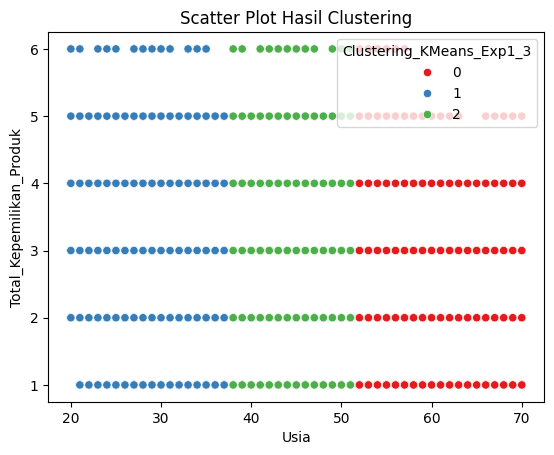

In [41]:
sns.scatterplot(data=data0_encoded, x='Usia', y='Total_Kepemilikan_Produk', hue='Clustering_KMeans_Exp1_3', palette='Set1')
plt.title('Scatter Plot Hasil Clustering')
plt.show()

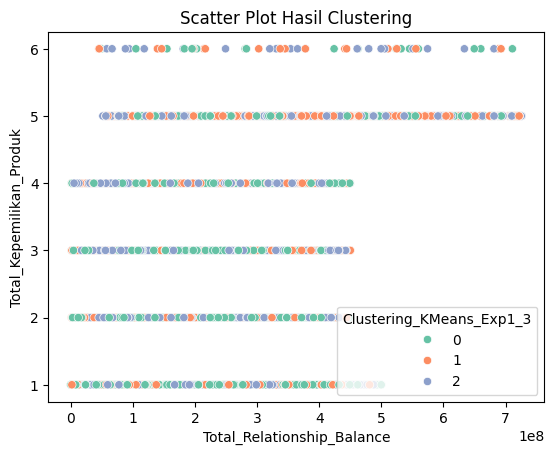

In [42]:
sns.scatterplot(data=data0_encoded, x='Total_Relationship_Balance', y='Total_Kepemilikan_Produk', hue='Clustering_KMeans_Exp1_3', palette='Set2')
plt.title('Scatter Plot Hasil Clustering')
plt.show()

In [43]:
cluster_means = data0_encoded[['Usia','Jumlah_Anak','Produk_Tabungan','Produk_Deposito',
                       'Produk_Kartu_Kredit','Produk_Kredit_Rumah','Produk_Kredit_Kendaraan',
                       'Produk_Kredit_Dana_Tunai','Total_Kepemilikan_Produk',
                       'Total_Relationship_Balance','Clustering_KMeans_Exp1_3']].groupby('Clustering_KMeans_Exp1_3').mean()
print(cluster_means)
pd

                               Usia  Jumlah_Anak  Produk_Tabungan  \
Clustering_KMeans_Exp1_3                                            
0                         58.063617     1.474844         0.688565   
1                         29.503177     1.191528         1.000000   
2                         44.974856     1.295617         0.988107   

                          Produk_Deposito  Produk_Kartu_Kredit  \
Clustering_KMeans_Exp1_3                                         
0                                0.600416             0.342204   
1                                0.592436             0.308018   
2                                0.603126             0.333333   

                          Produk_Kredit_Rumah  Produk_Kredit_Kendaraan  \
Clustering_KMeans_Exp1_3                                                 
0                                    0.612474                 0.170062   
1                                    0.586989                 0.157337   
2                          

<module 'pandas' from '/Users/vendly/Library/Python/3.9/lib/python/site-packages/pandas/__init__.py'>

Group 0

In [44]:
data0_encoded[data0_encoded['Clustering_KMeans_Exp1_3'] == 0][['Usia', 'Jumlah_Anak', 
                                                               'Total_Kepemilikan_Produk', 'Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,2405.000000,2405.000000,2405.000000,2.405000e+03
mean,58.063617,1.474844,2.955509,2.379434e+08
std,5.298230,1.478314,1.053131,1.382820e+08
min,52.000000,0.000000,1.000000,1.028000e+03
25%,54.000000,0.000000,2.000000,1.245667e+08
50%,57.000000,1.000000,3.000000,2.322131e+08
75%,61.000000,3.000000,4.000000,3.491686e+08
max,70.000000,4.000000,6.000000,7.181097e+08


In [45]:
data0_encoded[data0_encoded['Clustering_KMeans_Exp1_3'] == 0]['Area'].value_counts(normalize=True)

Area
Jakarta     0.482328
Bandung     0.163825
Surabaya    0.125572
Solo        0.125572
Jogja       0.074012
Bogor       0.028690
Name: proportion, dtype: float64

In [46]:
data0_encoded[data0_encoded['Clustering_KMeans_Exp1_3'] == 0]['Vintage'].value_counts(normalize=True)

Vintage
2 - 3 Tahun    0.486486
< 1 Tahun      0.310603
> 4 Tahun      0.202911
Name: proportion, dtype: float64

In [47]:
data0_encoded[data0_encoded['Clustering_KMeans_Exp1_3'] == 0]['Pendidikan'].value_counts(normalize=True)

Pendidikan
Sarjana                 0.265281
SD                      0.197089
SMA                     0.179626
Tidak Sekolah Formal    0.103950
Doktor                  0.086486
SMP                     0.083992
Magister                0.083576
Name: proportion, dtype: float64

In [48]:
data0_encoded[data0_encoded['Clustering_KMeans_Exp1_3'] == 0]['Jenis_Kelamin'].value_counts(normalize=True)

Jenis_Kelamin
Laki-laki    0.672765
Perempuan    0.327235
Name: proportion, dtype: float64

Group 1

In [49]:
data0_encoded[data0_encoded['Clustering_KMeans_Exp1_3'] == 1][['Usia', 'Jumlah_Anak', 
                                                               'Total_Kepemilikan_Produk', 'Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,3305.000000,3305.000000,3305.000000,3.305000e+03
mean,29.503177,1.191528,3.243873,2.439352e+08
std,4.254972,1.480683,1.008655,1.452356e+08
min,20.000000,0.000000,1.000000,1.016565e+06
25%,26.000000,0.000000,3.000000,1.222784e+08
50%,30.000000,0.000000,3.000000,2.408255e+08
75%,33.000000,2.000000,4.000000,3.578412e+08
max,37.000000,4.000000,6.000000,7.228870e+08


In [52]:
data0_encoded[data0_encoded['Clustering_KMeans_Exp1_3'] == 1]['Area'].value_counts(normalize=True)

Area
Jakarta     0.476248
Bandung     0.179728
Surabaya    0.126475
Solo        0.118306
Jogja       0.073222
Bogor       0.026021
Name: proportion, dtype: float64

In [53]:
data0_encoded[data0_encoded['Clustering_KMeans_Exp1_3'] == 1]['Vintage'].value_counts(normalize=True)

Vintage
2 - 3 Tahun    0.501967
< 1 Tahun      0.293192
> 4 Tahun      0.204841
Name: proportion, dtype: float64

In [54]:
data0_encoded[data0_encoded['Clustering_KMeans_Exp1_3'] == 1]['Pendidikan'].value_counts(normalize=True)

Pendidikan
Sarjana                 0.274130
SMA                     0.192436
SD                      0.180333
Doktor                  0.097731
Magister                0.087443
SMP                     0.084720
Tidak Sekolah Formal    0.083207
Name: proportion, dtype: float64

In [55]:
data0_encoded[data0_encoded['Clustering_KMeans_Exp1_3'] == 1]['Jenis_Kelamin'].value_counts(normalize=True)

Jenis_Kelamin
Laki-laki    0.640847
Perempuan    0.359153
Name: proportion, dtype: float64

Group 2

In [56]:
data0_encoded[data0_encoded['Clustering_KMeans_Exp1_3'] == 2][['Usia', 'Jumlah_Anak', 
                                                               'Total_Kepemilikan_Produk', 'Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,2943.000000,2943.000000,2943.000000,2.943000e+03
mean,44.974856,1.295617,3.158342,2.384758e+08
std,3.976996,1.474092,1.038061,1.439379e+08
min,38.000000,0.000000,1.000000,1.587496e+06
25%,42.000000,0.000000,2.000000,1.178243e+08
50%,45.000000,1.000000,3.000000,2.325173e+08
75%,48.000000,3.000000,4.000000,3.468223e+08
max,51.000000,4.000000,6.000000,7.259942e+08


In [57]:
data0_encoded[data0_encoded['Clustering_KMeans_Exp1_3'] == 2]['Area'].value_counts(normalize=True)

Area
Jakarta     0.481821
Bandung     0.163099
Surabaya    0.132518
Solo        0.113829
Jogja       0.081210
Bogor       0.027523
Name: proportion, dtype: float64

In [58]:
data0_encoded[data0_encoded['Clustering_KMeans_Exp1_3'] == 2]['Vintage'].value_counts(normalize=True)

Vintage
2 - 3 Tahun    0.505607
< 1 Tahun      0.295957
> 4 Tahun      0.198437
Name: proportion, dtype: float64

In [60]:
data0_encoded[data0_encoded['Clustering_KMeans_Exp1_3'] == 2]['Pendidikan'].value_counts(normalize=True)

Pendidikan
Sarjana                 0.269113
SD                      0.185865
SMA                     0.180428
SMP                     0.096840
Doktor                  0.092083
Magister                0.089365
Tidak Sekolah Formal    0.086306
Name: proportion, dtype: float64

In [62]:
data0_encoded[data0_encoded['Clustering_KMeans_Exp1_3'] == 2]['Jenis_Kelamin'].value_counts(normalize=True)

Jenis_Kelamin
Laki-laki    0.675841
Perempuan    0.324159
Name: proportion, dtype: float64

## Kesimpulan

Dari semua model, rata-rata memiliki <i>silhouette score</i> di bawah 70% yaitu sekitar 30% hingga 50%. Maka dari itu berdasarkan data <i>silhouette score</i>, FundFusion masih belum memiliki strategi yang tepat untuk menawarkan jenis produk yang sesuai dengan segmen calon nasabah yang akan direkrut. Sehingga bisa disampaikan bahwa dalam iterasi pembangunan model ini masih belum mencapai <i>objective</i> yang diinginkan. Solusi pengembangan selanjutnya yang dapat dilakukan diantaranya yaitu bisa dengan menambahkan variabel seperti balance per <i>product</i> yang tersedia dalam FundFusion agar data yang tersedia dapat semakin jelas dan bisa diketahui nasabah lebih banyak menyimpan dananya dimana, seperti di tabungan atau deposito, atau hanya menggunakan untuk kredit, bisa saja nasabah memiliki pinjaman yang banyak tetapi tabungannya kecil. Maka dari itu strategi yang dapat dilakukan selanjutnya yaitu menambahkan data agar train model menggunakan algoritma K-Means dan juga K-Medoids bisa memiliki <i>silhouette score</i> lebih baik.